170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 84ms/step - accuracy: 0.3258 - loss: 1.8094 - val_accuracy: 0.5073 - val_loss: 1.3644
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 72ms/step - accuracy: 0.5457 - loss: 1.2721 - val_accuracy: 0.5823 - val_loss: 1.1831
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.6106 - loss: 1.0953 - val_accuracy: 0.6168 - val_loss: 1.0821
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.6472 - loss: 0.9962 - val_accuracy: 0.6589 - val_loss: 0.9746
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 71ms/step - accuracy: 0.6808 - loss: 0.9141 - val_accuracy: 0.6589 - val_loss: 0.9758
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.7024 - loss: 0.8523 - val_accuracy: 0.6777 - val_loss: 0.9216
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.7236 - loss: 0.7937 - val_accuracy: 0.7006 - val_loss: 0.8703
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.7451 - loss: 0.7331 - 

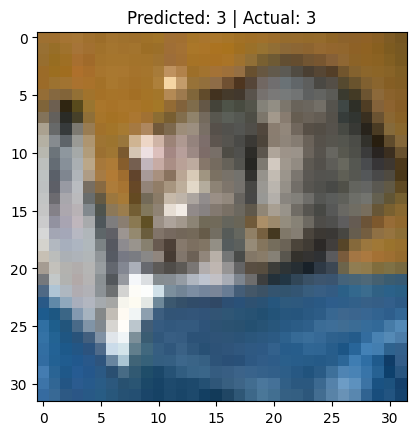

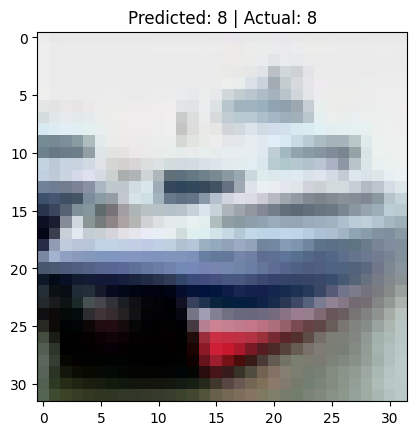

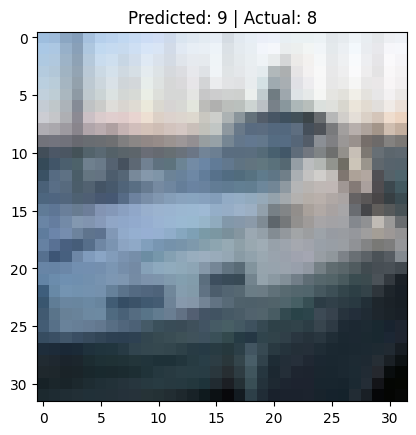

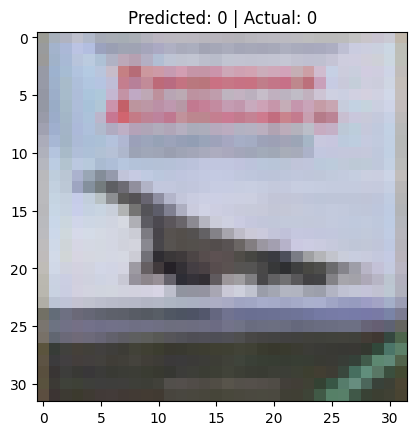

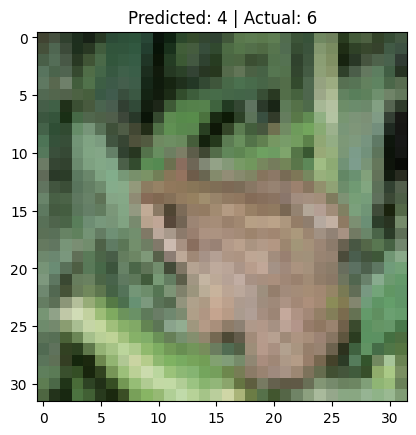

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset (common image classification dataset)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN architecture
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the 3D output to 1D
    layers.Flatten(),

    # Fully Connected Layer
    layers.Dense(64, activation='relu'),

    # Output Layer with 10 neurons (one for each class)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Predict on some test images
predictions = model.predict(x_test[:5])

# Display the first 5 test images along with their predictions
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predictions[i].argmax()} | Actual: {y_test[i][0]}")
    plt.show()
